## Visualize an example simulation as it moves towards equilibrium

In [1]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.response import *
from lib.preferences import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style("white")

plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 150
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True

In [3]:
# Font sizes
plt.rc('font', size=12)         # controls default text sizes
plt.rc('axes', titlesize=14)    # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

## Preferences

In [4]:
analysis_metrics = ["HX", "VX", 
                    'frac_mixed_samples','mean_k',
                    'n_segregating','pi','theta',
                    'avg_frac_ibd', 'avg_n_ibd','avg_l_ibd']

In [5]:
genetic_names.update({
    "mean_k": "C.O.I ($k$)",
    "pi": "Nucl. Diversity ($\pi$)",
    "avg_l_ibd": "Avg. IBD\nTrack Length (bp)"
})

In [6]:
savefig = True

## Load averaged data

In [7]:
expt = "ins"

In [8]:
temp = "../analysis/2020-06-07_intv-%s"

# Path
expt_path = temp % expt

# Load full data
epoch_df = pd.read_csv(expt_path + "/epoch_df.csv")
epoch_df.index = epoch_df.name
op_mu = pd.read_csv(expt_path + "/ops_mean.csv")
op_se = pd.read_csv(expt_path + "/ops_se.csv")
og_mu = pd.read_csv(expt_path + "/ogs_mean.csv")
og_se = pd.read_csv(expt_path + "/ogs_se.csv")

# Merge
ot_mu = pd.merge(left=op_mu, right=og_mu, on="t0")
ot_se = pd.merge(left=op_se, right=og_se)

In [9]:
time_limits = (epoch_df.loc["InitVar", "t0"], epoch_df.loc["Recovery", "t0"] + 75*365)

## Plot

### Prevalence

[-9125.00000000003, 0.0] [0.6538461538461539, 0.6538461538461539]
[0.0, 36499.999999999985] [0.1991101223581757, 0.1991101223581757]


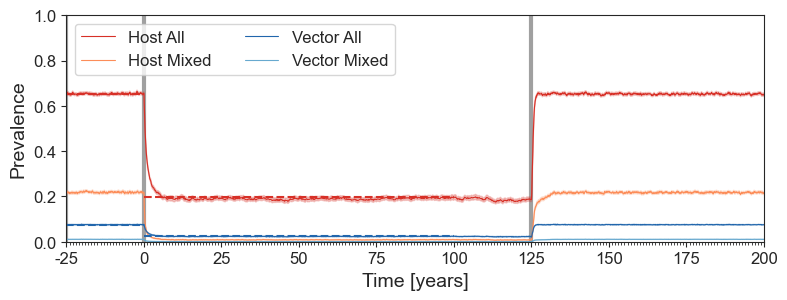

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3))

prevalence_trajectory_average_plot(ot_mu, ot_se, epoch_df, ax,
                                   col_dt=prevalence_col_dt,
                                   norm_t0=("Crash", "t0"),
                                   indicate_epochs=[("Crash", "t0"), ("InitVar", "t0"), ("CrashVar", "t1")],
                                   indicate_equilibriums=["InitVar", "Crash"],
                                   time_limits=time_limits,
                                   years_per_major_tick=25)

ax.set_xlabel("Time [years]")
ax.set_ylabel("Prevalence")
ax.legend(loc="upper left", ncol=2)

if savefig:
    fig.savefig("../figs/sec3_traj-avg-prevalence-sm-%s.png" % expt, 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec3_traj-avg-prevalence-sm-%s.pdf" % expt,  
                bbox_inches="tight", pad_inches=0.5)

### Genetics

In [11]:
metrics = tight_metrics
n_metrics = len(metrics)

In [12]:
genetic_names.update({"avg_l_ibd": "Avg. IBD Track Length (bp)"})

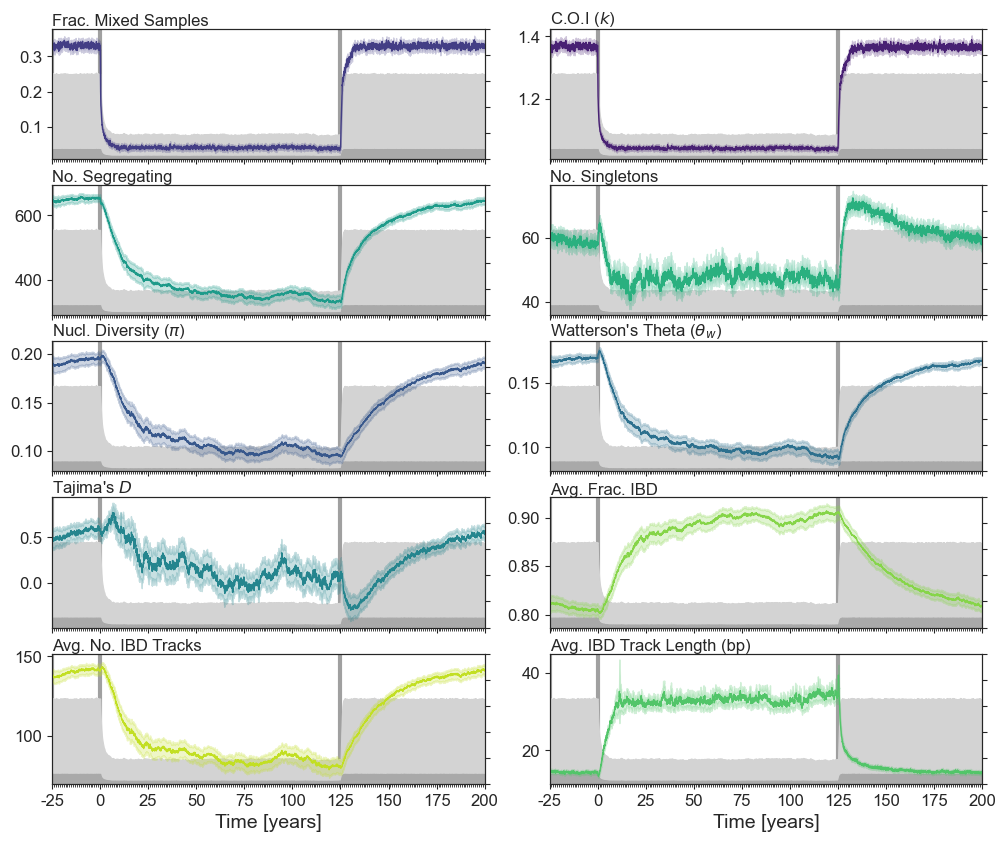

In [13]:
fig, axes = plt.subplots(int(n_metrics/2), 2, figsize=(12, 10), sharex=True)
fig.subplots_adjust(hspace=0.2, wspace=0.15)

for ax, metric in zip(axes.flatten(), metrics):
    
    # Averaged
    genetic_trajectory_average_plot(metric, ot_mu, ot_se, epoch_df,
                                    tight_metric_col_dt[metric], ax,
                                    norm_t0=("Crash", "t0"),
                                    indicate_epochs=[("Crash", "t0"), ("InitVar", "t0"), ("CrashVar", "t1")],
                                    time_limits=time_limits,
                                    years_per_major_tick=25)
        
    if metric in ["avg_n_ibd", "avg_l_ibd"]:
        ax.set_xlabel("Time [years]")

    # y
    #ax.set_ylabel(genetic_names[metric], fontsize=12)
    ax.set_title(genetic_names[metric], pad=1,
                 fontsize=12, loc="left")
#     ax.annotate(s=genetic_names[metric], xy=(0.1, 0.95), xycoords="axes fraction", 
#                 ha="left", va="top",
#                 bbox=dict(boxstyle="square", fc="white", ec="grey", lw=1, alpha=0.75))
    
if savefig:
    fig.savefig("../figs/sec3_traj-avg-genetics-sm-%s.png" % expt, 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec3_traj-avg-genetics-sm-%s.pdf" % expt,  
                bbox_inches="tight", pad_inches=0.5)